In [3]:
import pandas as pd
cars_df=pd.read_csv('C:/UsersMeenakshi\Desktop\GitHub\Machine Learning IIMB\data')

FileNotFoundError: [Errno 2] File b'C:/Users/Meenakshi/Desktop/Machine Learning IIMB/data/Auto.csv' does not exist: b'C:/Users/Meenakshi/Desktop/Machine Learning IIMB/data/Auto.csv'

In [75]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [76]:
cars_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Data Cleaning

In [77]:
cars_df[-cars_df.horsepower.str.isnumeric()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [78]:
pd.to_numeric?

In [79]:
cars_df['horsepower'] =pd.to_numeric(cars_df['horsepower'],errors='coerce')

In [80]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


### Explaoratory Analysis

In [81]:
cars_df.year.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [82]:
cars_df.origin.unique()

array([1, 3, 2], dtype=int64)

In [83]:
import matplotlib.pyplot as plt
import seaborn as sn

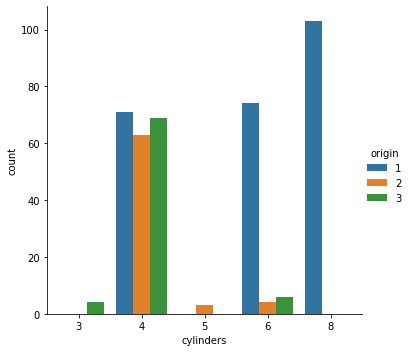

In [84]:
sn.catplot(data=cars_df, 
           x='cylinders', 
           hue='origin',
           kind='count')

### Fuel Efficiency

In [85]:
cars_4_df=cars_df[cars_df.cylinders==4]

In [86]:
cars_4_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 14 to 396
Data columns (total 9 columns):
mpg             203 non-null float64
cylinders       203 non-null int64
displacement    203 non-null float64
horsepower      199 non-null float64
weight          203 non-null int64
acceleration    203 non-null float64
year            203 non-null int64
origin          203 non-null int64
name            203 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 15.9+ KB


In [87]:
american_mpg =cars_4_df[cars_4_df.origin==1]['mpg']
japanese_mpg =cars_4_df[cars_4_df.origin==3]['mpg']

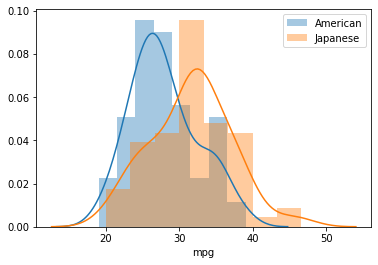

In [88]:
sn.distplot(american_mpg, label= 'American')
sn.distplot(japanese_mpg, label= 'Japanese');
plt.legend();

In [89]:
from scipy import stats
stats.ttest_ind(american_mpg, japanese_mpg)

Ttest_indResult(statistic=-4.35909999590582, pvalue=2.5341001696451143e-05)

In [90]:
from scipy import stats
stats.ttest_ind(japanese_mpg, american_mpg)

Ttest_indResult(statistic=4.35909999590582, pvalue=2.5341001696451143e-05)

In [91]:
american_mpg.mean()

27.908450704225356

In [92]:
american_mpg.std()

4.544753536579239

In [93]:
japanese_mpg.mean()

31.595652173913034

In [94]:
japanese_mpg.std()

5.435786505747018

In [95]:
stats.norm.interval(0.95,american_mpg.mean(),american_mpg.std())

(19.00089745391901, 36.8160039545317)

In [96]:
stats.norm.interval(0.95,japanese_mpg.mean(),japanese_mpg.std())

(20.941706395000054, 42.249597952826015)

### Box Plot

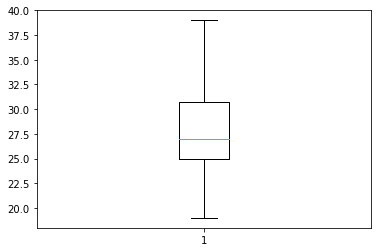

In [97]:
box=plt.boxplot(american_mpg);

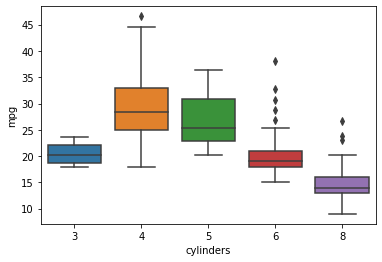

In [98]:
sn.boxplot(data=cars_df,
           x='cylinders',
           y='mpg');

In [99]:
cars_df[cars_df.cylinders ==6].sort_values("mpg", ascending=False)[0:4]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
386,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)
333,32.7,6,168.0,132.0,2910,11.4,80,3,datsun 280-zx
360,30.7,6,145.0,76.0,3160,19.6,81,2,volvo diesel
306,28.8,6,173.0,115.0,2595,11.3,79,1,chevrolet citation


### Weights Vs MPG

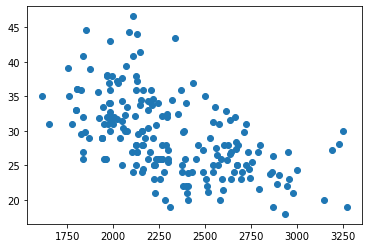

In [100]:
plt.scatter(cars_4_df.weight, cars_4_df.mpg);

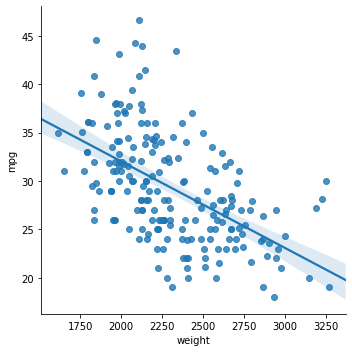

In [101]:
sn.lmplot(data= cars_4_df, 
          x='weight',
         y='mpg');

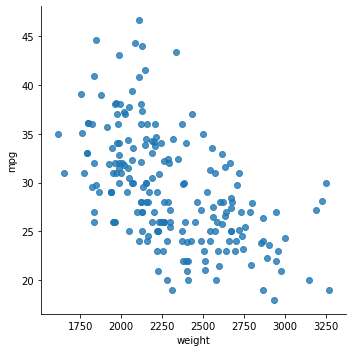

In [102]:
sn.lmplot(data= cars_4_df, 
          x='weight',
         y='mpg',
         fit_reg=False);

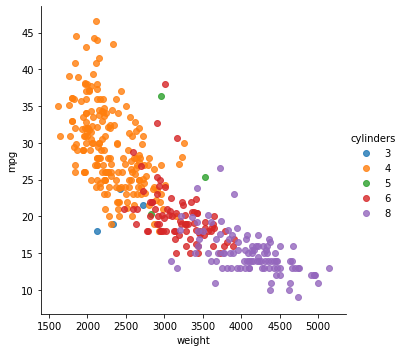

In [103]:
sn.lmplot(data= cars_df, 
          x='weight',
         y='mpg',
         hue='cylinders',
         fit_reg=False);

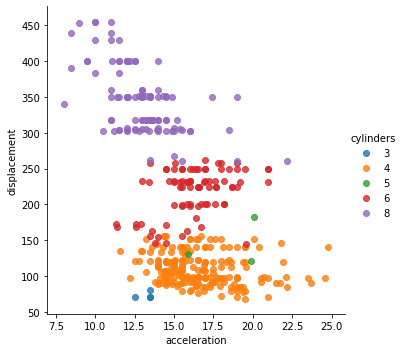

In [104]:
sn.lmplot(data= cars_df, 
          x='acceleration',
         y='displacement',
         hue='cylinders',
         fit_reg=False);

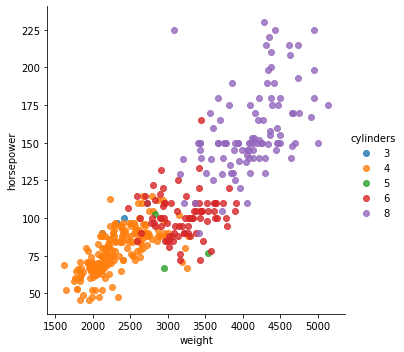

In [105]:
sn.lmplot(data= cars_df, 
          x='weight',
         y='horsepower',
          hue='cylinders',
         fit_reg=False);

In [106]:
[item.get_ydata()[0] for item in box['caps']]

[19.0, 39.0]

In [107]:
[item.get_ydata()[0] for item in box['whiskers']]

[25.0, 30.7]

### List Comprehension

In [108]:
a=[1,2,3,4,5]
b=[x*x for x in a]

In [109]:
b

[1, 4, 9, 16, 25]

### Correlation Map or Heat Map

In [110]:
cars_df_v1= cars_df[['mpg',
                    'acceleration',
                    'weight',
                    'horsepower']]



In [112]:
cars_df_v1= cars_df_v1.dropna()

In [113]:
cars_df_v1.corr()

,mpg,acceleration,weight,horsepower
mpg,1.000000,0.423329,-0.832244,-0.778427
acceleration,0.423329,1.000000,-0.416839,-0.689196
weight,-0.832244,-0.416839,1.000000,0.864538
horsepower,-0.778427,-0.689196,0.864538,1.000000


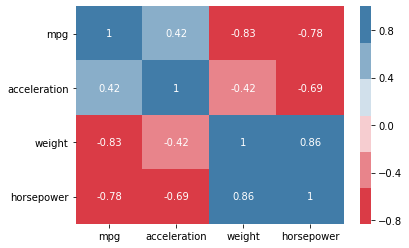

In [116]:
sn.heatmap(cars_df_v1.corr(), 
           annot=True, 
          cmap=sn.diverging_palette(10,240));

### Line Plot

In [125]:
avg_mpg= (cars_4_df.groupby("year")['mpg']
          .mean()
          .reset_index())

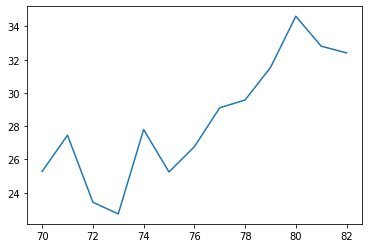

In [126]:
plt.plot(avg_mpg.year, avg_mpg.mpg);

In [123]:
avg_mpg

year
70    25.285714
71    27.461538
72    23.428571
73    22.727273
74    27.800000
75    25.250000
76    26.766667
77    29.107143
78    29.576471
79    31.525000
80    34.612000
81    32.814286
82    32.407407
Name: mpg, dtype: float64

### Verify Version

In [117]:
print (pd.__version__)

0.24.2


In [118]:
print (sn.__version__)

0.9.0


In [120]:
import matplotlib
print (matplotlib.__version__)

3.1.0
